## 💽 Google Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ⬇️ Data Download

In [3]:
!unzip /content/drive/MyDrive/animal_computer_vision.zip

Archive:  /content/drive/MyDrive/animal_computer_vision.zip
  inflating: Data/Buffalo/Buffalo_1.jpg  
  inflating: Data/Buffalo/Buffalo_10.jpg  
  inflating: Data/Buffalo/Buffalo_100.jpg  
  inflating: Data/Buffalo/Buffalo_1000.jpg  
  inflating: Data/Buffalo/Buffalo_101.jpg  
  inflating: Data/Buffalo/Buffalo_102.jpg  
  inflating: Data/Buffalo/Buffalo_103.jpg  
  inflating: Data/Buffalo/Buffalo_104.jpg  
  inflating: Data/Buffalo/Buffalo_105.jpg  
  inflating: Data/Buffalo/Buffalo_106.jpg  
  inflating: Data/Buffalo/Buffalo_107.jpg  
  inflating: Data/Buffalo/Buffalo_108.jpg  
  inflating: Data/Buffalo/Buffalo_109.jpg  
  inflating: Data/Buffalo/Buffalo_11.jpg  
  inflating: Data/Buffalo/Buffalo_110.jpg  
  inflating: Data/Buffalo/Buffalo_111.jpg  
  inflating: Data/Buffalo/Buffalo_112.jpg  
  inflating: Data/Buffalo/Buffalo_113.jpg  
  inflating: Data/Buffalo/Buffalo_114.jpg  
  inflating: Data/Buffalo/Buffalo_115.jpg  
  inflating: Data/Buffalo/Buffalo_116.jpg  
  inflating: Data/B

## 📥 > 📙 Import to Libraries

In [6]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import Sequential
import tensorflow as tf

## 📋 Data Preparing

In [94]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None,
    validation_split=0.2)
train_generator = train_datagen.flow_from_directory("/content/Data",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",
                                                    subset="training",
                                                    classes=['Buffalo','Elephant','Rhino','Zebra'],)
test_generator = train_datagen.flow_from_directory("/content/Data",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",
                                                    classes=['Buffalo','Elephant','Rhino','Zebra'],
                                                    subset="validation")

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


## 🧱 Models Structure and Code [Function]

In [73]:
def func(pre,name_model):
    print('#####~Model => {} '.format(name_model))
    pre_model = name_model(input_shape=(128,128, 3),
                   include_top=False,
                   weights='imagenet',
                   pooling='avg')
    pre_model.trainable = False
    inputs = pre_model.input
    x = Dense(64, activation='relu')(pre_model.output)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]
    
    history = model.fit(train_generator,validation_data=test_generator,epochs=50,callbacks=my_callbacks,verbose=0)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

In [65]:
def emir_model():
  inp = Input(shape = (128,128,3))

  x = Conv2D(64, (3,3), strides=(2,2), padding='same', activation='relu', use_bias=True)(inp)
  x = BatchNormalization()(x)
  x = SpatialDropout2D(0.4)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(128, (3,3), strides=(2,2), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = SpatialDropout2D(0.4)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(256, (3,3), strides=(2,2), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = SpatialDropout2D(0.2)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(64, (3,3), strides=(2,2), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = SpatialDropout2D(0.2)(x)
  x = Flatten()(x)
  x = Dense(64, activation='relu')(x)
  x = Dense(64, activation='relu')(x)
  x = Dense(4, activation='sigmoid')(x)

  model = Model(inputs=inp, outputs= x)
  return model

In [90]:
def func(name_model):

    print('#####~Model => {} '.format(name_model))

    model = emir_model()
    model.summary()

    model.compile(optimizer="adam",loss="mse",metrics=["accuracy"])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]
    
    history = model.fit(train_generator,
                        validation_data=test_generator,
                        epochs=128,
                        callbacks=my_callbacks,
                        verbose=0,
                        batch_size=128,)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results[0],results[1],model

## 🏃‍♂️ Prep Models and My Model Benchmark Scores

### VGG19

#####~Model => <function VGG19 at 0x7f6a3826f0e0> 


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


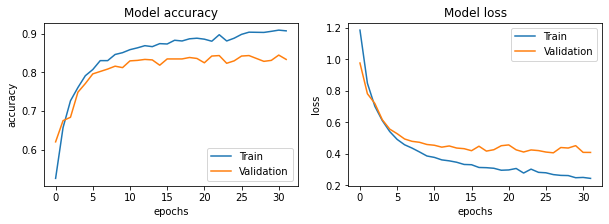

              Classification_report 
              Results 
    Test Loss:  0.40747  
Test Accuracy:  83.38%  


In [74]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
result_VGG19 = func(preprocess_input,VGG19)

### VGG16

#####~Model => <function VGG16 at 0x7f6a38269b90> 
58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


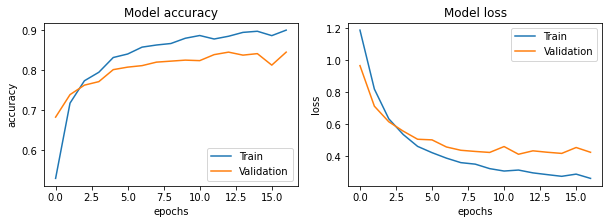

              Classification_report 
              Results 
    Test Loss:  0.42436  
Test Accuracy:  84.50%  


In [75]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
result_VGG16 = func(preprocess_input,VGG16)

### ResNet50

#####~Model => <function ResNet50 at 0x7f6a382e1c20> 


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


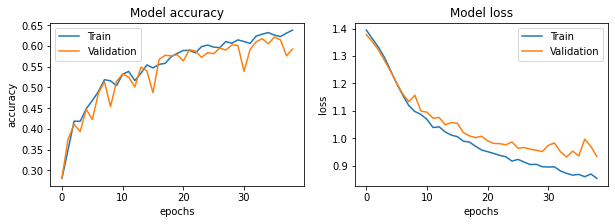

              Classification_report 
              Results 
    Test Loss:  0.93350  
Test Accuracy:  59.25%  


In [76]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
result_ResNet50 = func(preprocess_input,ResNet50)

### ResNet101

#####~Model => <function ResNet101 at 0x7f6a382e1cb0> 
171458560/171446536 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


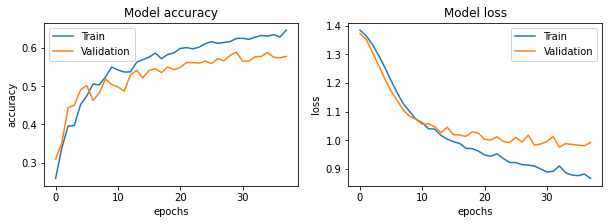

              Classification_report 
              Results 
    Test Loss:  0.99160  
Test Accuracy:  57.75%  


In [77]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
result_ResNet101 = func(preprocess_input,ResNet101)

### MobileNet

#####~Model => <function MobileNet at 0x7f6a382c5a70> 
17235968/17225924 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


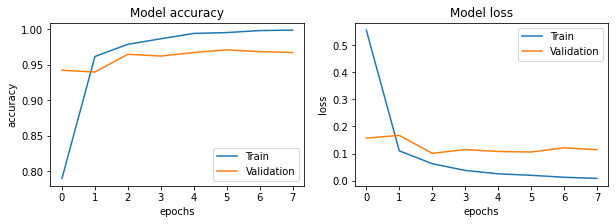

              Classification_report 
              Results 
    Test Loss:  0.11422  
Test Accuracy:  96.75%  


In [78]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
result_MobileNet = func(preprocess_input,MobileNet)

### DenseNet201

#####~Model => <function DenseNet201 at 0x7f6a382a79e0> 
74850304/74836368 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


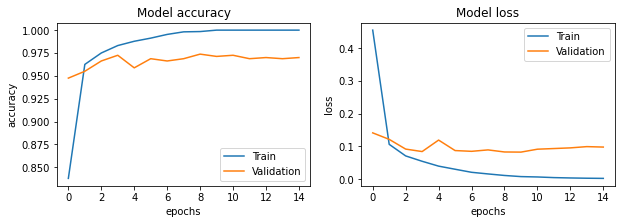

              Classification_report 
              Results 
    Test Loss:  0.09774  
Test Accuracy:  97.00%  


In [79]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
result_DenseNet201 = func(preprocess_input,DenseNet201)

### EfficientNetB7

#####~Model => <function EfficientNetB7 at 0x7f6a382abb90> 


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


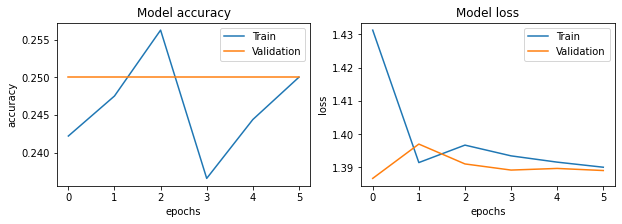

              Classification_report 
              Results 
    Test Loss:  1.38906  
Test Accuracy:  25.00%  


In [80]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input
result_Eff = func(preprocess_input,EfficientNetB7)

### Xception

#####~Model => <function Xception at 0x7f6a3826f5f0> 
83697664/83683744 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


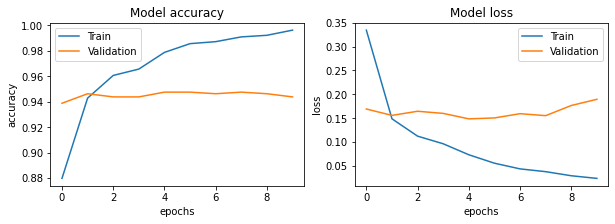

              Classification_report 
              Results 
    Test Loss:  0.18951  
Test Accuracy:  94.38%  


In [81]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
result_Xception = func(preprocess_input,Xception)

### InceptionResNetV2

#####~Model => <function InceptionResNetV2 at 0x7f6a382bd710> 
219070464/219055592 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


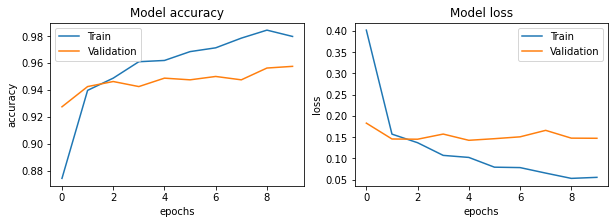

              Classification_report 
              Results 
    Test Loss:  0.14707  
Test Accuracy:  95.75%  


In [82]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
result_InResNetV2 = func(preprocess_input,InceptionResNetV2)

### Model Emirhan

#####~Model => Animal_Computer_Vision_Clean_Dataset 
Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_321 (Conv2D)         (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization_339 (Ba  (None, 64, 64, 64)       256       
 tchNormalization)                                               
                                                                 
 spatial_dropout2d_67 (Spati  (None, 64, 64, 64)       0         
 alDropout2D)                                                    
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
     

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


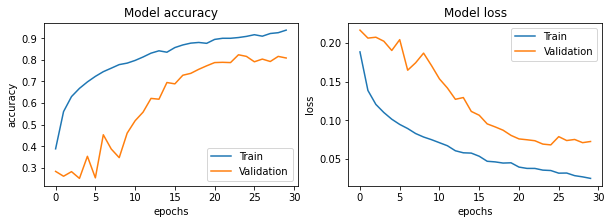

              Classification_report 
              Results 
    Test Loss:  0.07236  
Test Accuracy:  80.87%  


In [91]:
model_name = "Animal_Computer_Vision_Clean_Dataset"
result_emirhan = func(model_name)

## 📊 Finally Result of Table (DataFrame - Pandas)

In [83]:
accuracy_result_table = pd.DataFrame({'Model':['Emirhan_Model','VGG16','VGG19','ResNet50','ResNet101','MobileNet','InceptionResNetV2',
                               'DenseNet201','Xception','EfficientNetB7'],
                      'Accuracy':[result_emirhan[1],result_VGG16[1], result_VGG19[1], result_ResNet50[1], result_ResNet101[1],
                                  result_MobileNet[1],result_InResNetV2[1],result_DenseNet201[1],result_Xception[1],
                                 result_Eff[1]]})

In [84]:
accuracy_result_table

,Model,Accuracy
0,Emirhan_Model,0.81250
1,VGG16,0.84500
2,VGG19,0.83375
3,ResNet50,0.59250
4,ResNet101,0.57750
5,MobileNet,0.96750
6,InceptionResNetV2,0.95750
7,DenseNet201,0.97000
8,Xception,0.94375
9,EfficientNetB7,0.25000


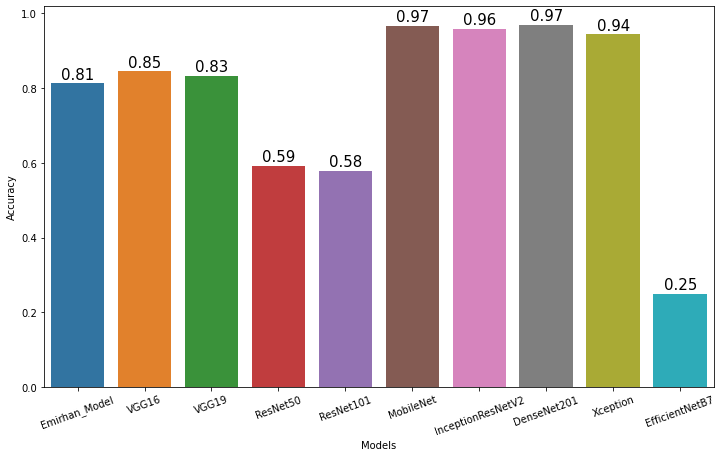

In [85]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=accuracy_result_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);

In [86]:
loss_result_table = pd.DataFrame({'Model':['Emirhan_Model','VGG16','VGG19','ResNet50','ResNet101','MobileNet','InceptionResNetV2',
                               'DenseNet201','Xception','EfficientNetB7'],
                      'Loss':[result_emirhan[0],result_VGG16[0], result_VGG19[0], result_ResNet50[0], result_ResNet101[0],
                                  result_MobileNet[0],result_InResNetV2[0],result_DenseNet201[0],result_Xception[0],
                                 result_Eff[0]]})

In [87]:
loss_result_table

,Model,Loss
0,Emirhan_Model,0.071937
1,VGG16,0.424360
2,VGG19,0.407469
3,ResNet50,0.933495
4,ResNet101,0.991605
5,MobileNet,0.114222
6,InceptionResNetV2,0.147069
7,DenseNet201,0.097736
8,Xception,0.189510
9,EfficientNetB7,1.389058


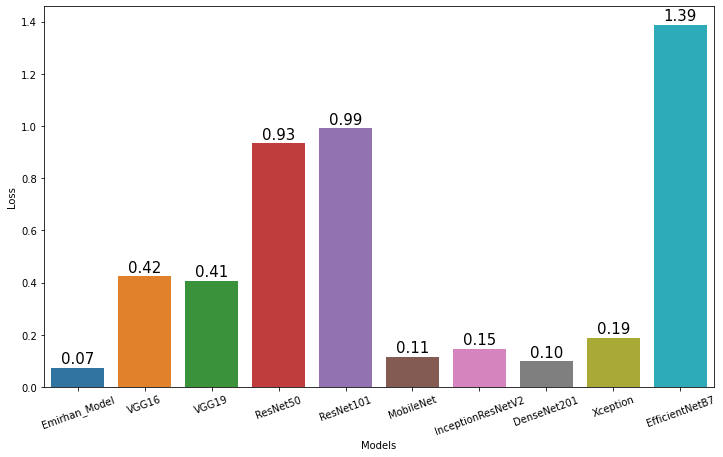

In [88]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Loss', data=loss_result_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Loss")
plt.xticks(rotation=20);

In [104]:
BATCH_SIZE = 128
IMG_SIZE = (128, 128)

# Split into train/test
# by default, class names are infered, and converted to int
train_dataset = tf.keras.utils.image_dataset_from_directory(directory = 'Dataset',
                                                            validation_split=0.2,
                                                            subset='training',
                                                            shuffle=True,
                                                            seed=1,
                                                            batch_size=128,
                                                            image_size=(128,128))

validation_dataset = tf.keras.utils.image_dataset_from_directory(directory = 'Dataset',
                                                                 validation_split=0.2,
                                                                 subset='validation',
                                                                 shuffle=True,
                                                                 seed=1,
                                                                 batch_size=128,
                                                                 image_size=(128,128))

Found 4000 files belonging to 4 classes.
Using 3200 files for training.
Found 4000 files belonging to 4 classes.
Using 800 files for validation.


## 💭 Visualizing data

###Train Dataset

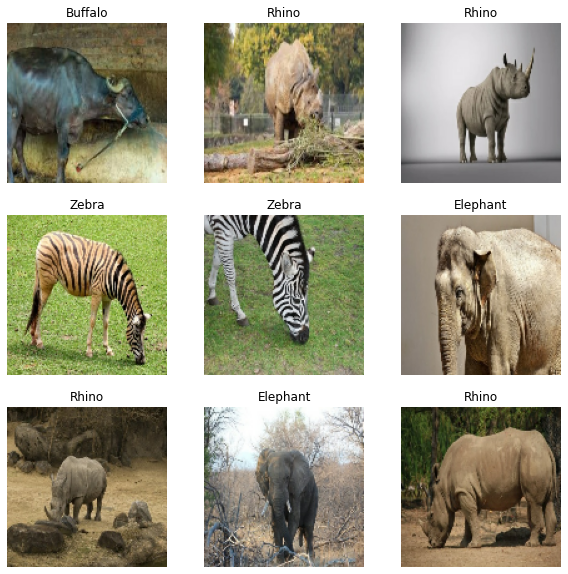

In [105]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

###Validation Dataset

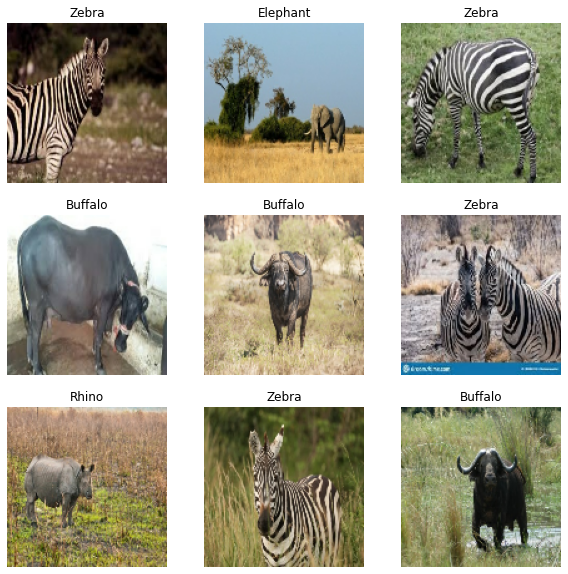

In [106]:
class_names = validation_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in validation_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")